In [ ]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fb = pd.read_csv('pseudo_facebook.csv')

In [ ]:
fb=fb.astype({'userid': np.int64,
'age':np.int64,
'dob_day':                    np.int64,
'dob_year':                   np.int64,
'dob_month':                  np.int64,
'gender':                    object,
'tenure':                   np.float64,
'friend_count':               np.int64,
'friendships_initiated':      np.int64,
'likes':                      np.int64,
'likes_received':             np.int64,
'mobile_likes' :              np.int64,
'mobile_likes_received':      np.int64,
'www_likes':                  np.int64,
'www_likes_received':         np.int64})

In [ ]:
fb.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


# **1. Sanity check**

In [ ]:
check_null = fb.isnull()
check_null

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Generic Variable Distribution**

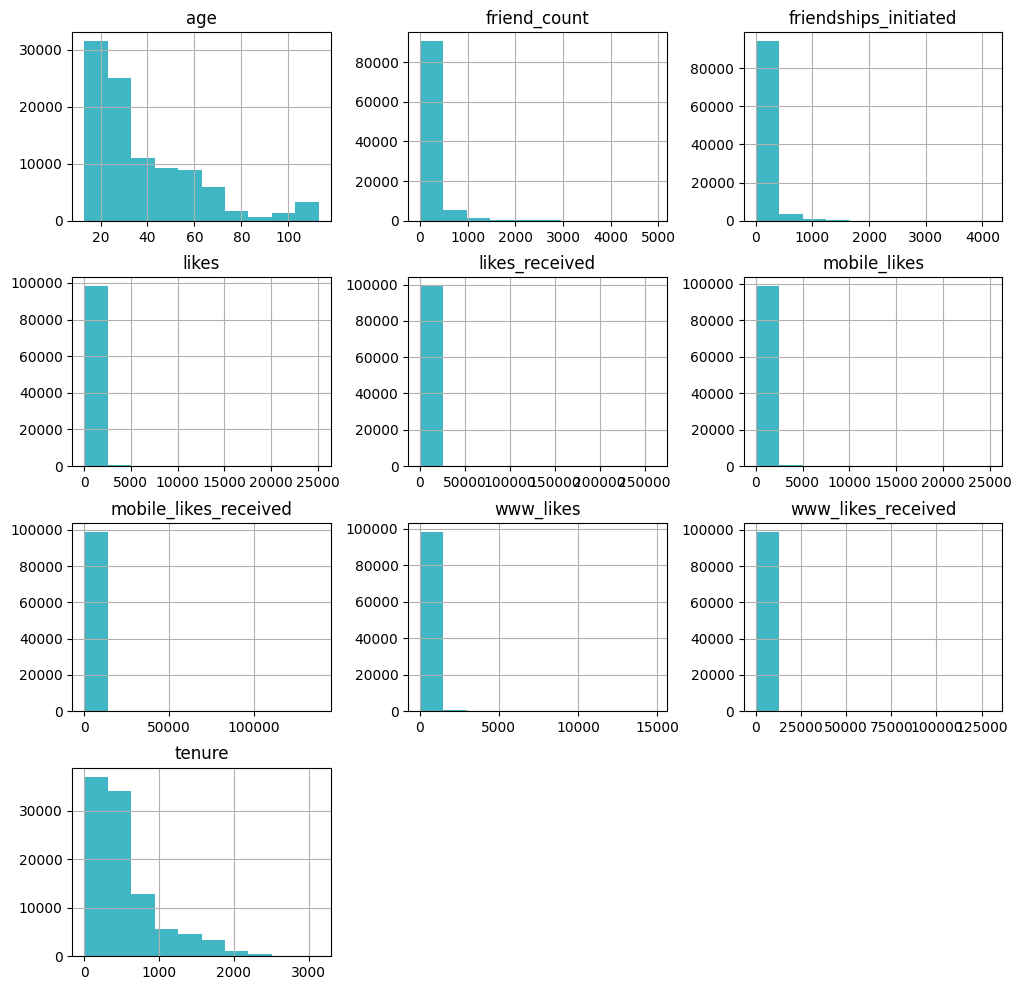

In [ ]:
fb.columns.values
fb.dtypes
forhist=['age','friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received','tenure']
fb_subset1=pd.DataFrame(fb[forhist])
fb_subset1.hist(figsize=(12,12), color='#41b6c4')
plt.show()

**Users with most number of likes**

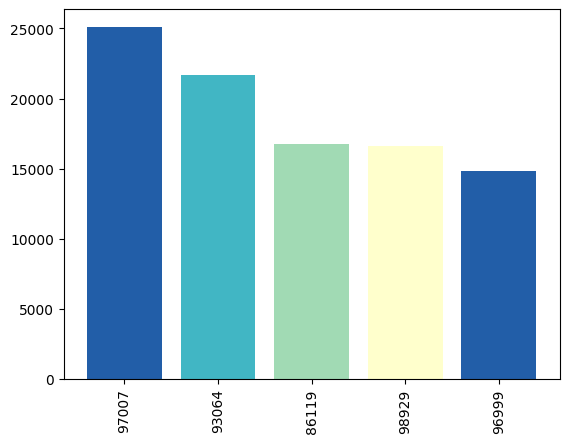

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
mycolors=np.array(['#F8B195','#F67280','#C06C84','#6C5B7B', '#355C7D'])
mycolors=np.array(['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'])
k=fb[['userid','likes']].reset_index()
k['likes'].sort_values(ascending=False)[:5].plot(kind='bar', color=mycolors, width=0.8)
plt.show()

In [ ]:
# remove outliers
def rem_out(elements):
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    final_list = [x for x in elements if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
    return final_list

**Friend Count Distribution**

For 95% observations we have friend count between 0 to 1000

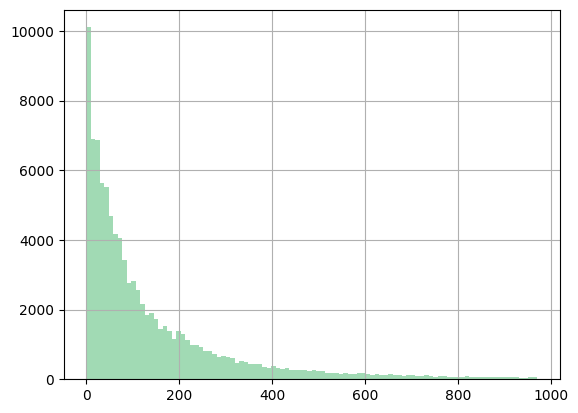

In [ ]:
pd.Series(rem_out(fb_subset1['friend_count'])).hist(bins=100, color='#a1dab4')
plt.show()

**Top 5**

In [ ]:
fb[['friend_count','userid']].sort_values(by='friend_count', ascending = False)[:5].set_index('userid')


,friend_count
userid,
2090699,4923
1660276,4917
1926655,4863
1685573,4845
1386477,4844


**Likes Distribution**

For 95% observations we have likes between 0 to 1200

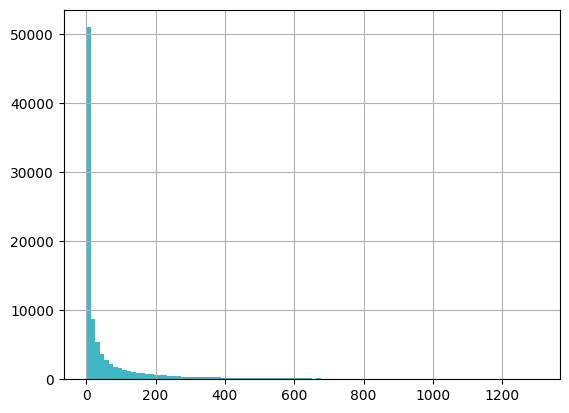

In [ ]:
Generic_likes=rem_out(fb['likes'])
pd.Series(Generic_likes).hist(bins=100, color='#41b6c4')
plt.show()

# **2. Exploratory Analysis**

**Correlation plot shows magnitude of correlation between pairwise variables in dataset**

1.   Friend count & friendships inititated are strongly correlated
2.   We would ignore correlations of subsets of likes & likes received as these are bound to be correlated (here we refer to mobile & site likes/likes received)
3.   Tenure and Age also seem to be related




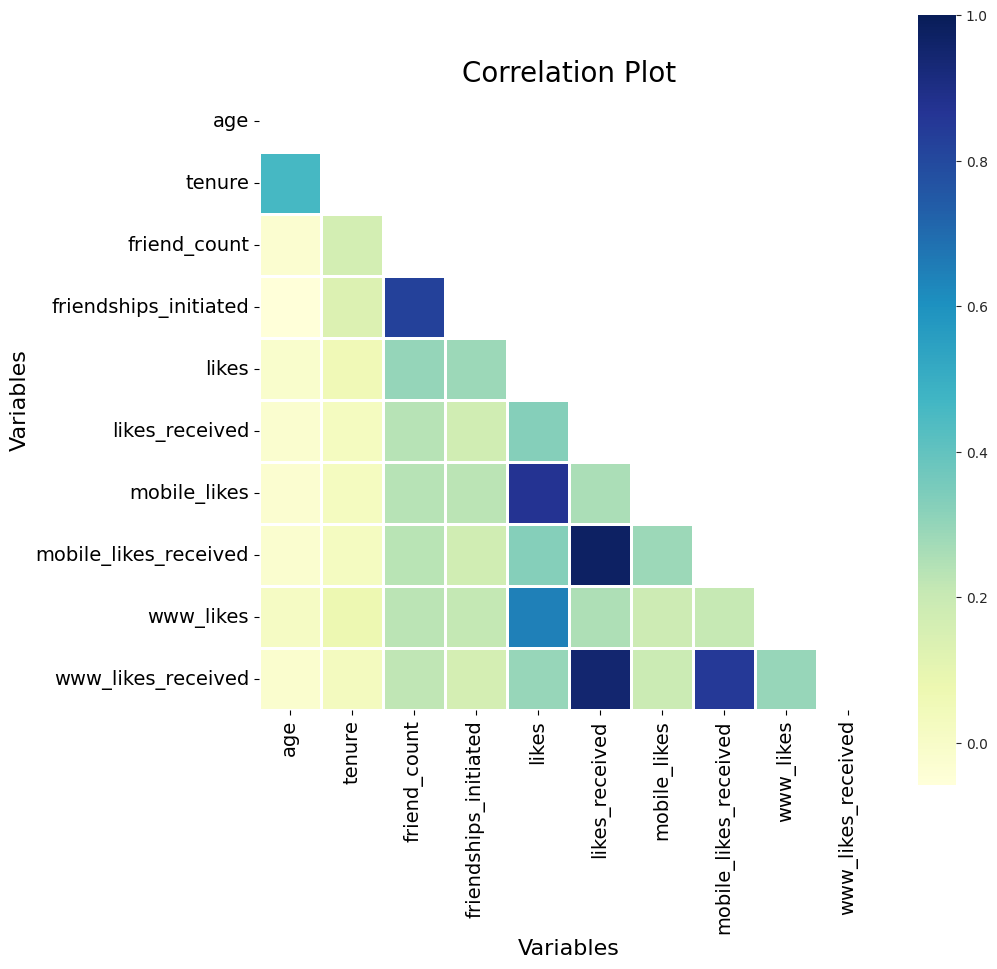

In [ ]:
import seaborn as sns 
# Remove object column in dataframe to use heatmap (Gender here)
cols=['age','tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received']
fb_hm=fb[cols]
fb_hm=fb_hm.fillna(0)
# sns.heatmap(features.drop(['columnName01_OfTypeObject','columnName02_OfTypeObject'],axis=1)
corr = fb_hm.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10)) 
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,cmap="YlGnBu", linewidths=.8)
ax.set_title('Correlation Plot', size=20)
ax.set_xlabel('Variables', size=16)
ax.set_ylabel('Variables', size=16)
ax.set_xticklabels(cols,fontsize=14)
ax.set_yticklabels(cols,fontsize=14)
plt.show()

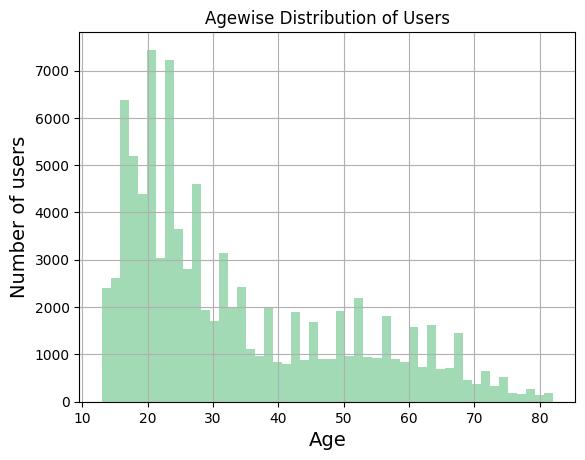

In [ ]:
# Agewise Distribution
age = pd.Series(rem_out(fb['age']))
age.hist(bins=50, color='#a1dab4')
plt.xlabel("Age", size=14)
plt.ylabel("Number of users", size=14)
plt.title("Agewise Distribution of Users")
plt.show()

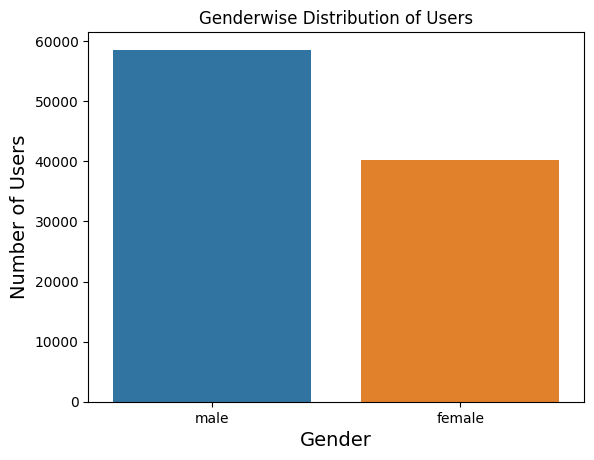

In [ ]:
# Genderwise Distribution
sns.countplot(x='gender', data=fb)
plt.xlabel("Gender", size=14)
plt.ylabel("Number of Users", size=14)
plt.title("Genderwise Distribution of Users")
plt.show()

**Likes Given (Depicting Individual Preference)**

1.   It's a one to many relationship, a user gives likes to many people.
2.   Top 4,6,7 & 10 users prefer the site more than mobile app
3.   Still a general skew towards mobile app

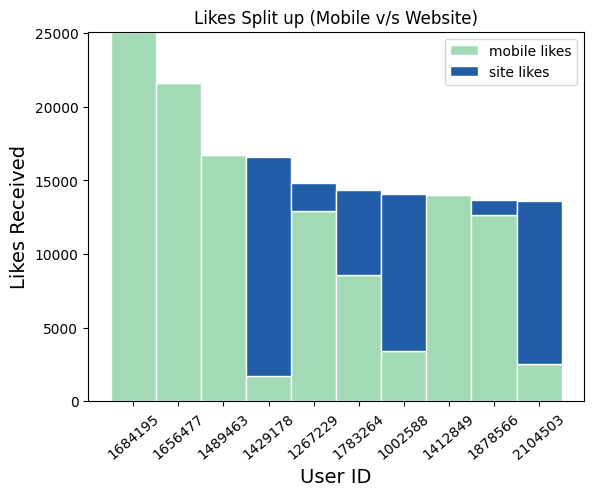

In [ ]:
fb_toplikes = fb.sort_values(by='likes', ascending=False)[:10]
bars1 = fb_toplikes['mobile_likes']
bars2 = fb_toplikes['www_likes']
r = range(10)
names = fb_toplikes['userid']
barWidth = 1
plt.bar(r, bars1, color='#a1dab4', edgecolor='white',
        width=barWidth, label='mobile likes')
plt.bar(r, bars2, bottom=bars1, color='#225ea8',
        edgecolor='white', width=barWidth, label='site likes')
plt.xticks(r, names, rotation=40)
plt.xlabel("User ID", size=14)
plt.ylabel("Likes Received", size=14)
plt.title("Likes Split up (Mobile v/s Website)")
plt.legend(loc='best')
plt.show()

**Likes Recieved (Depicting Popularity)**

1.   It's a many to one relationship, many people give likes to a user.
2.   Top users's likes show shift of people's preferences towards mobile apps rather than site (mostly higher mobile likes than site likes)

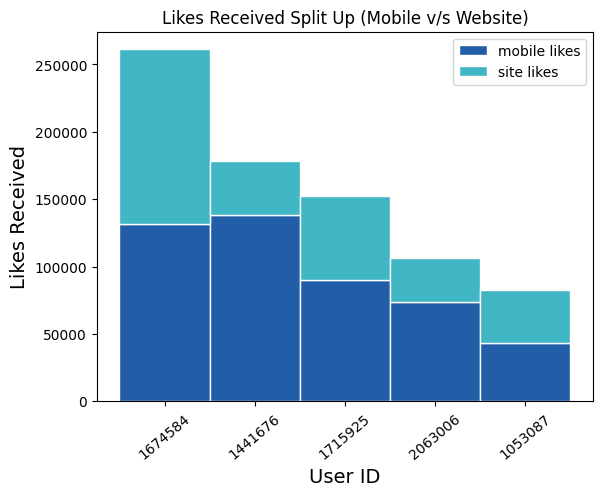

In [ ]:
fb_toplikes_received = fb.sort_values(by='likes_received', ascending=False)[:5]
bars1 = fb_toplikes_received['mobile_likes_received']
bars2 = fb_toplikes_received['www_likes_received']
r = [0, 1, 2, 3, 4]
names = fb_toplikes_received['userid']
barWidth = 1
plt.bar(r, bars1, color='#225ea8', edgecolor='white',
        width=barWidth, label='mobile likes')
plt.bar(r, bars2, bottom=bars1, color='#41b6c4',
        edgecolor='white', width=barWidth, label='site likes')
plt.xticks(r, names, rotation=40)
plt.xlabel("User ID", size=14)
plt.ylabel("Likes Received", size=14)
plt.title("Likes Received Split Up (Mobile v/s Website)")
plt.legend(loc='best')
plt.show()

**Gender Preference**

1.   Interesting obsservation for gender specific interaction with facebook: women like as well as are liked a lot more than men (nearly 2.5 as much).
2.   Generically these likes & likes received are comparable to each other for both men & women.
3.   Same behaviour is true when the likes/like received are split up between mobile & site, here it's nearly 3 times more in some cases.

**Friends Counts & Friendships Initiated**

Women have more friends than men on facebook, the friendships initiated in proportion to friend count are more in case of men than women

In [ ]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['likes','likes_received'],aggfunc='mean')

In [ ]:
fb['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [ ]:
fb_gender_pivot

,likes,likes_received
gender,,
NA,138.508571,157.382857
female,260.051324,251.435435
male,84.677895,67.911548


In [ ]:
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]

In [ ]:
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Likes Received (*100 million)", size = 14)
plt.title("Likes & Likes Received by gender")
plt.legend(loc='best')

In [ ]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received'],aggfunc='mean')
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Likes & Likes Received", size = 14)
plt.title("Likes & Likes Received by gender (mobile & site)")
plt.legend(loc='best')

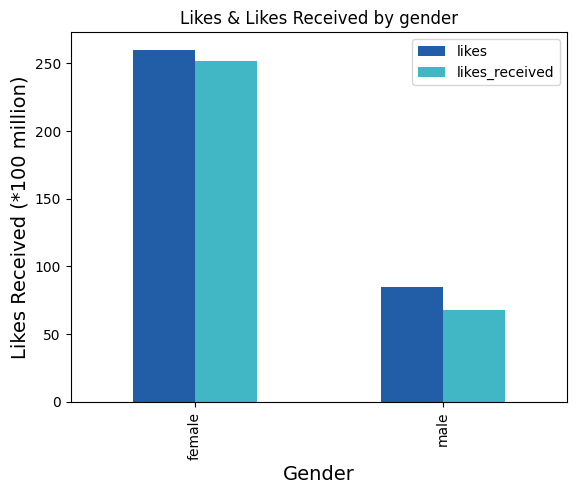

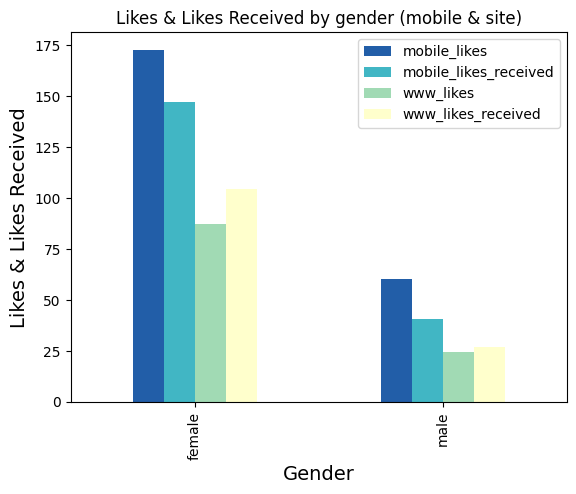

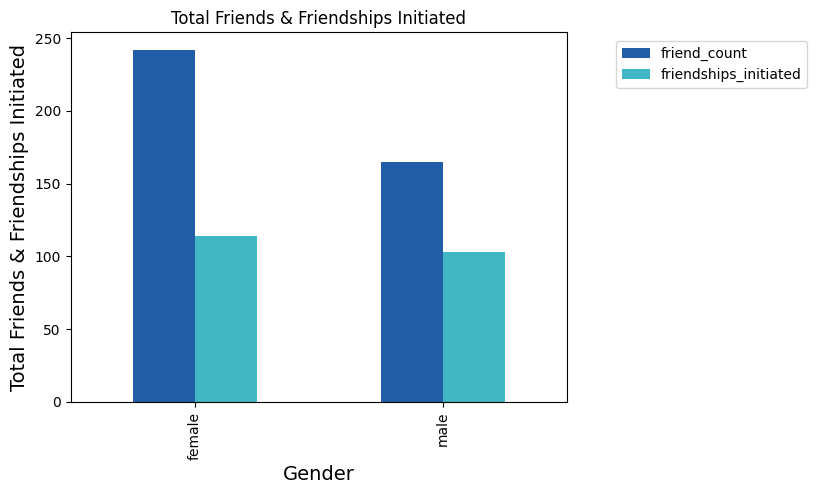

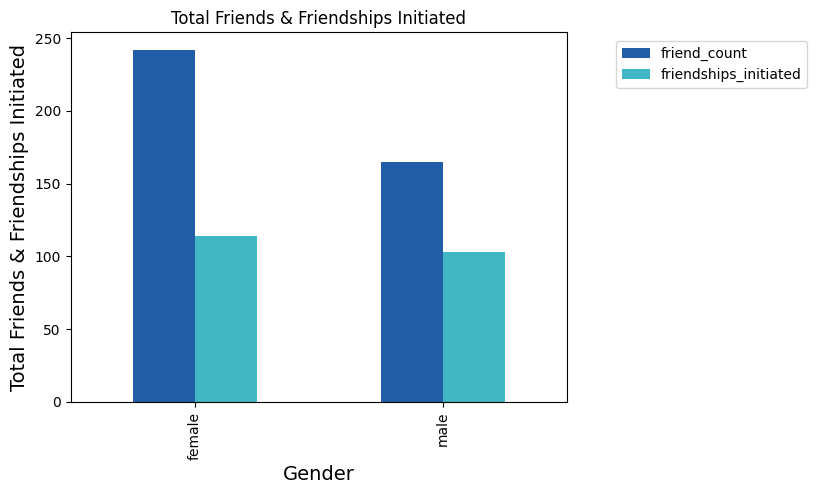

In [ ]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['friend_count', 'friendships_initiated'],aggfunc='mean')
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Total Friends & Friendships Initiated", size = 14)
plt.title("Total Friends & Friendships Initiated")
plt.legend(loc=(1.1,.85))
plt.show()

**3. Modelling**

We will try to predict likes received on the basis of other predictors (leaving out inter-related variables such as likes received from mobile, site etc.). This is to understand dependence of profile visibility on the variables that are given.

In [ ]:
model_columns=['age', 'dob_day', 'dob_year', 'dob_month', 'gender',
       'tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received'=]
fb_model=fb.dropna()

In [ ]:
categorical_columns = ['gender']
f=['age',
       'tenure', 'friend_count', 'friendships_initiated',
       'likes_received']
formula = '{}'.format(' + '.join(['C({})'.format(x) for x in categorical_columns]))
m = 'likes ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in f]))

In [ ]:
n=m+'+'+formula
n

'likes ~ 0 + Q("age") + Q("tenure") + Q("friend_count") + Q("friendships_initiated") + Q("likes_received")+C(gender)'

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices(n, data=fb_model, return_type='dataframe')

In [ ]:
##########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2867.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:05:19   Log-Likelihood:            -5.2665e+05
No. Observations:               69178   AIC:                         1.053e+06
Df Residuals:                   69171   BIC:                         1.053e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(gender)[female]   

In [ ]:
########
from sklearn import metrics
prediction = pd.DataFrame(model.fit().predict(X_test))

In [ ]:
Results=y_test.merge(prediction, left_index=True, right_index=True)

In [ ]:
from numpy import sqrt, mean
MAPE = sqrt(mean(abs(Results[0]-Results['likes'])**2))
MAPE

584.6661456053743

In [ ]:
Results=Results.reset_index()[['likes',0]]
Results.columns=['Actual','Predicted']

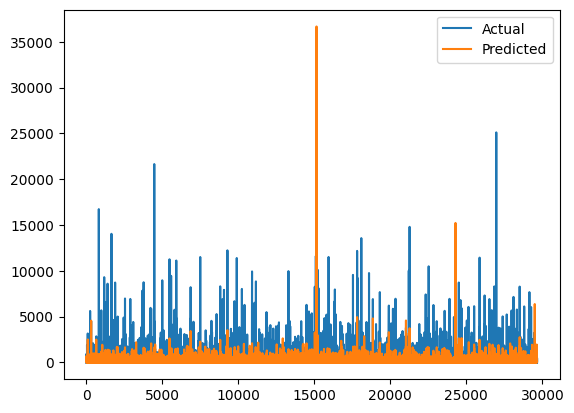

In [ ]:
Results.plot(kind='line')
plt.show()